In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
data=pd.read_csv('output.csv')

In [3]:
data.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
data.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [5]:
data.shape

(885548, 5)

In [6]:
data.describe(include='all')

,Year,Month,State,County,Rate
count,885548.000000,885548,885548,885548,885548.000000
unique,NaN,12,47,1752,NaN
top,NaN,March,Texas,Washington County,NaN
freq,NaN,74540,57658,8930,NaN
mean,2003.000017,NaN,NaN,NaN,6.175010
std,7.824893,NaN,NaN,NaN,3.112535
min,1990.000000,NaN,NaN,NaN,0.000000
25%,1996.000000,NaN,NaN,NaN,4.000000
50%,2003.000000,NaN,NaN,NaN,5.500000
75%,2010.000000,NaN,NaN,NaN,7.700000


In [7]:
data.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [8]:
data.State.nunique()

47

In [9]:
state=data.State.unique()
state


array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

In [10]:
#To check the number of rows that each unique state occupies in the dataset
state_count=data['State'].value_counts()
state_count

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Indiana           29808
Ohio              28512
Minnesota         28188
Mississippi       26568
Oklahoma          24948
Arkansas          24300
Michigan          24236
Wisconsin         23328
Alabama           21708
Pennsylvania      21708
South Dakota      21384
Colorado          20736
New York          20088
Montana           18144
West Virginia     17820
North Dakota      17172
California        16878
South Carolina    14904
Idaho             14256
Washington        12636
Oregon            11664
New Mexico        10692
Utah               9396
Maryland           7776
Wyoming            7452
New Jersey         6804
Louisiana          6464
Nevada             5508
Maine              5184
Arizona            4860
Vermont            4536
Massachusetts   

In [11]:
data.County.nunique()


1752

In [12]:
#To check the number of rows that each unique County occupies in the dataset
data['County'].value_counts()

Washington County      8930
Jefferson County       7334
Lincoln County         7107
Franklin County        6986
Jackson County         6654
                       ... 
Claiborne Parish        101
Saint Martin Parish     101
Morehouse Parish        101
Ascension Parish        101
Franklin Parish         101
Name: County, Length: 1752, dtype: int64

In [13]:
data.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [14]:
rate=data[data['Rate']==0]
print(rate)

        Year      Month  State           County  Rate
240571  1991   February  Texas    Loving County   0.0
245907  1991      March  Texas    Loving County   0.0
253942  1991    January  Texas    Loving County   0.0
261909  1991      April  Texas    Loving County   0.0
264736  1991   December  Texas    Loving County   0.0
270072  1991   November  Texas    Loving County   0.0
275416  1990    October  Texas  McMullen County   0.0
281122  1990     August  Texas  McMullen County   0.0
283943  1990        May  Texas  McMullen County   0.0
292152  1990  September  Texas  McMullen County   0.0
297526  1990   December  Texas    Loving County   0.0
316395  1993        May  Texas    Loving County   0.0
319216  1993    January  Texas    Loving County   0.0
324668  1993  September  Texas    Loving County   0.0
332623  1993       July  Texas    Loving County   0.0
343209  1992      March  Texas    Loving County   0.0
359437  1992      April  Texas    Loving County   0.0


In [15]:
#The above information shows that the highest unemployment rate recorded
high_rates=data[data['Rate']>25]
print(high_rates)

        Year     Month       State           County  Rate
9147    2015    August     Arizona      Yuma County  26.1
9733    2015    August  California  Imperial County  26.9
28716   2015      July     Arizona      Yuma County  25.5
29302   2015      July  California  Imperial County  27.4
34470   2014  February    Michigan  Mackinac County  25.6
...      ...       ...         ...              ...   ...
881680  2009      July     Arizona      Yuma County  27.6
882050  2009      July  California  Imperial County  30.3
882763  2009      July     Alabama    Wilcox County  27.3
884428  2009  November  California  Imperial County  28.2
885141  2009  November     Alabama    Wilcox County  26.9

[885 rows x 5 columns]


In [16]:
#The highest unemployment rate was 58.4 in San Juan County in 1992. 
rates=data[data['Rate']>58]
print(rates)

        Year    Month     State           County  Rate
351231  1992  January  Colorado  San Juan County  58.4


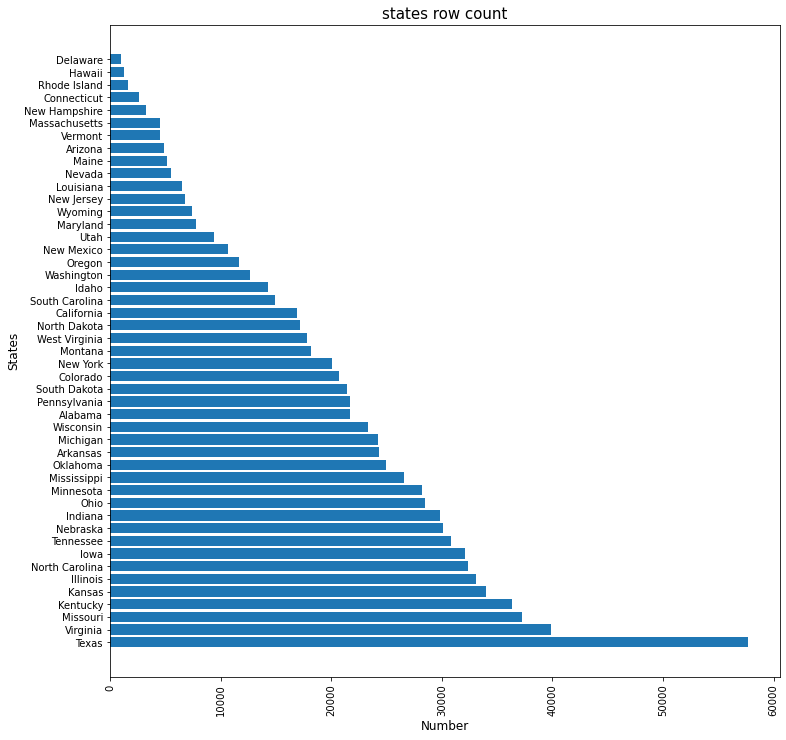

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(12,12))
plt.barh( state_count.index, state_count.values)
plt.xlabel('Number', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('states row count', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('State row count.png')

In [18]:
#Getting the average rate of unemployment for each state per year.
#reset index rearranges the index, assigns new index. This allows the created dataset to become a list and not a dictionary.
mean_state = data.groupby(["State", "Year"])["Rate"].aggregate("mean").reset_index()
print (mean_state)

        State  Year      Rate
0     Alabama  1990  8.226990
1     Alabama  1991  9.081841
2     Alabama  1992  9.296891
3     Alabama  1993  9.182463
4     Alabama  1994  7.622139
...       ...   ...       ...
1253  Wyoming  2012  5.199275
1254  Wyoming  2013  4.661957
1255  Wyoming  2014  4.121739
1256  Wyoming  2015  4.068841
1257  Wyoming  2016  4.969928

[1258 rows x 3 columns]


In [19]:
#Grouping by year #average unemployment rate by year
year= data.groupby(["Year"])["Rate"].aggregate("mean").reset_index()
print (year)

    Year      Rate
0   1990  6.093021
1   1991  7.142391
2   1992  7.464904
3   1993  6.924037
4   1994  6.186649
5   1995  5.893411
6   1996  5.912081
7   1997  5.474520
8   1998  5.114221
9   1999  4.873476
10  2000  4.321123
11  2001  4.985591
12  2002  5.720915
13  2003  6.027990
14  2004  5.695817
15  2005  5.438981
16  2006  4.979263
17  2007  4.896069
18  2008  5.759990
19  2009  8.883838
20  2010  9.189580
21  2011  8.523477
22  2012  7.657544
23  2013  7.211610
24  2014  6.096365
25  2015  5.401873
26  2016  5.160680


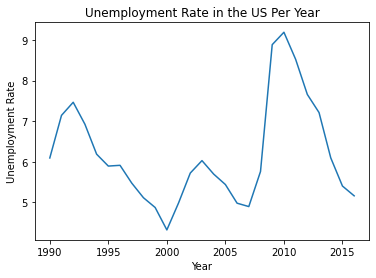

<Figure size 432x288 with 0 Axes>

In [20]:
#From this we can observe that the lowest unemployment rate was in 2000 and the highest in 2010
#to check the trend
plt.plot(year['Year'], year['Rate'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate in the US Per Year')
plt.show()
plt.savefig('unemployment_rate_in_the_USA_Per_Year.png')

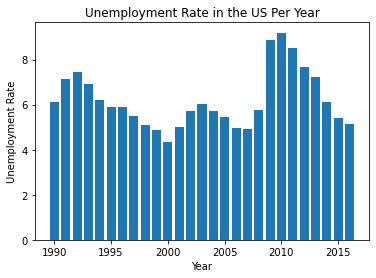

In [21]:
#From this we can observe that the lowest unemployment rate was in 2000 and the highest in 2010
#to check the trend
plt.bar(year['Year'], year['Rate'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate in the US Per Year')
plt.show()


In [22]:
# filter rows for year 2010 
year2010 = data[data.Year.eq(2010)]
year2010

,Year,Month,State,County,Rate
136792,2010,February,Mississippi,Newton County,10.5
136793,2010,February,Mississippi,Panola County,15.0
136794,2010,February,Mississippi,Monroe County,14.3
136795,2010,February,Mississippi,Hinds County,10.4
136796,2010,February,Mississippi,Kemper County,14.5
...,...,...,...,...,...
171163,2010,November,Maine,Somerset County,11.2
171164,2010,November,Maine,Oxford County,10.7
171165,2010,November,Maine,Knox County,7.2
171166,2010,November,Maine,Piscataquis County,9.6


Text(0.5, 1.0, 'Unemployment Rate by State for year 2010')

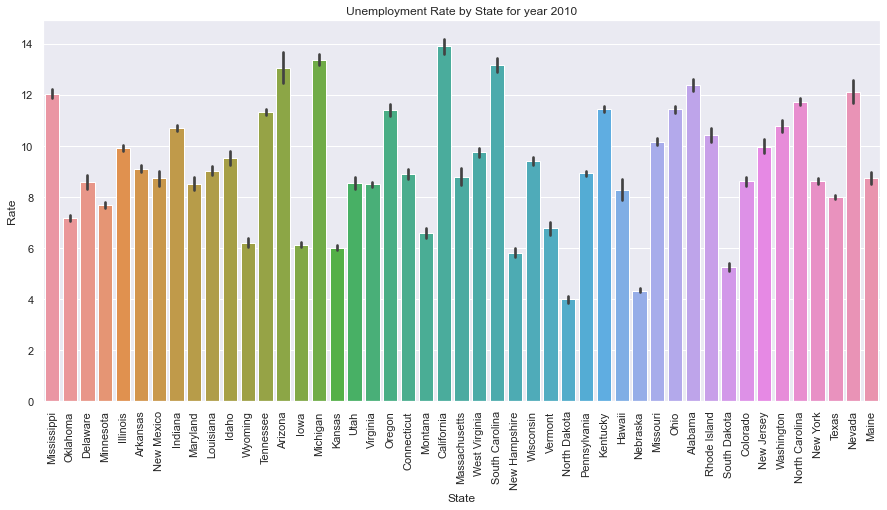

In [23]:
#checking for state with highest unemployment rate in 2010
sb.set(rc={'figure.figsize':(15,7)})
ax=sb.barplot(data=year2010,x='State',y='Rate')
for item in ax.get_xticklabels():#to give room for the x axis labels
    item.set_rotation(90)
    
ax.set_title("Unemployment Rate by State for year 2010")


Text(0.5, 1.0, 'Unemployment Rate by State')

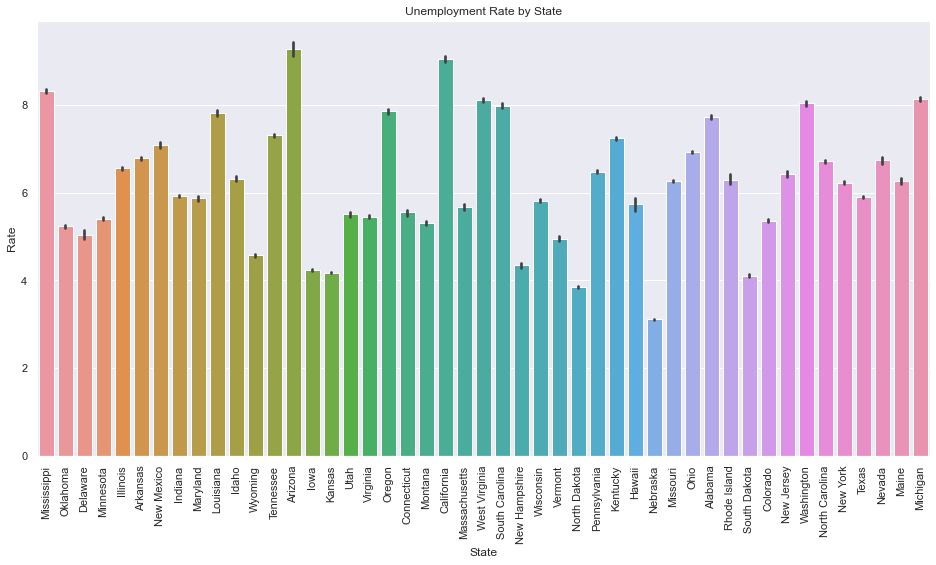

In [24]:
sb.set(rc={'figure.figsize':(16,8)})
axis=sb.barplot(data=data,x='State',y='Rate')
for item in axis.get_xticklabels():#to give room for the x axis labels
    item.set_rotation(90)
axis.set_title("Unemployment Rate by State")

Text(0.5, 1.0, 'Unemployment Rate by Month')

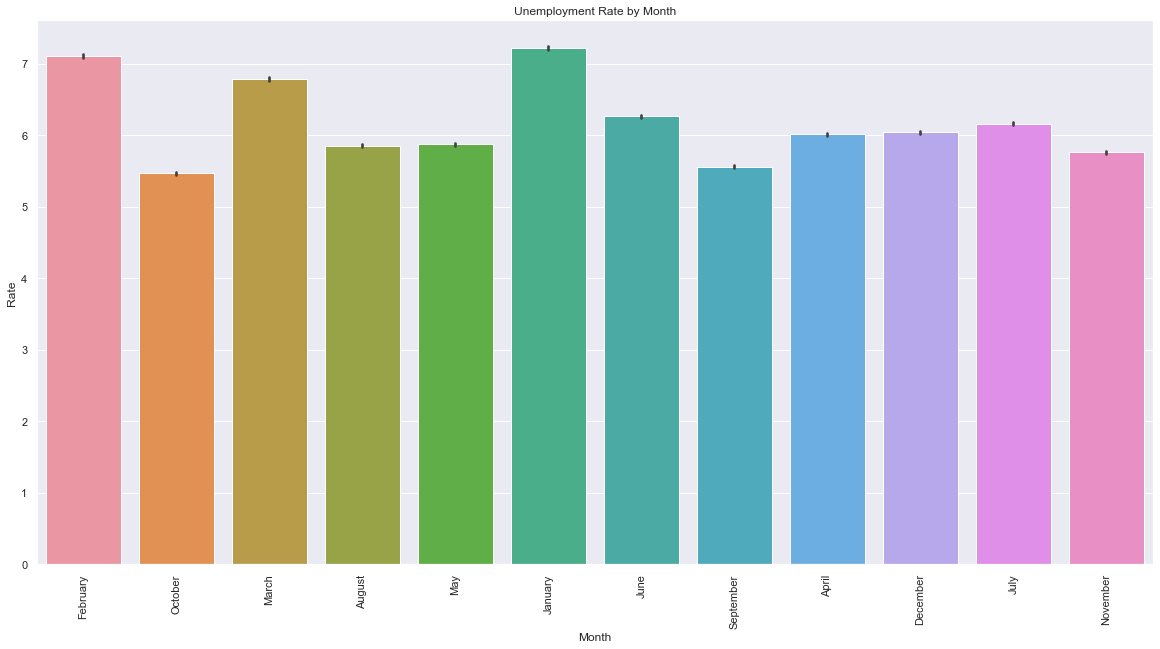

In [25]:
sb.set(rc={'figure.figsize':(20,10)})
axis=sb.barplot(data=data,x='Month',y='Rate')
for item in axis.get_xticklabels(): 
    item.set_rotation(90)
#to give room for the x axis labels    
axis.set_title("Unemployment Rate by Month")